In [1]:
import pandas as pd

# Read the original Excel file
df = pd.read_excel('ph3_v=10.xlsm')

In [2]:
print(df)

      wavenumber        t=100k        t=200k        t=300k        t=400k  \
0              0  8.294777e-28  3.047739e-27  5.634964e-29  7.731461e-28   
1             10  1.931540e-22  3.546140e-23  2.679683e-26  5.023992e-26   
2             20  2.241544e-21  4.515165e-22  1.895120e-26  1.873534e-25   
3             30  7.738656e-21  1.822697e-21  2.271195e-25  1.601245e-24   
4             40  4.160895e-20  1.433247e-20  9.897254e-24  3.728650e-23   
...          ...           ...           ...           ...           ...   
996         9960  6.244775e-25  6.463146e-25  6.800658e-25  8.461977e-25   
997         9970  6.326650e-25  7.358890e-25  7.586171e-25  9.209135e-25   
998         9980  1.008965e-24  8.007551e-25  7.053087e-25  8.297225e-25   
999         9990  7.170452e-25  5.506611e-25  4.882108e-25  6.134266e-25   
1000       10000  4.215882e-25  2.782442e-25  2.278408e-25  2.804284e-25   

            t=500k        t=600k        t=700k        t=800k        t=900k  \
0     6.2

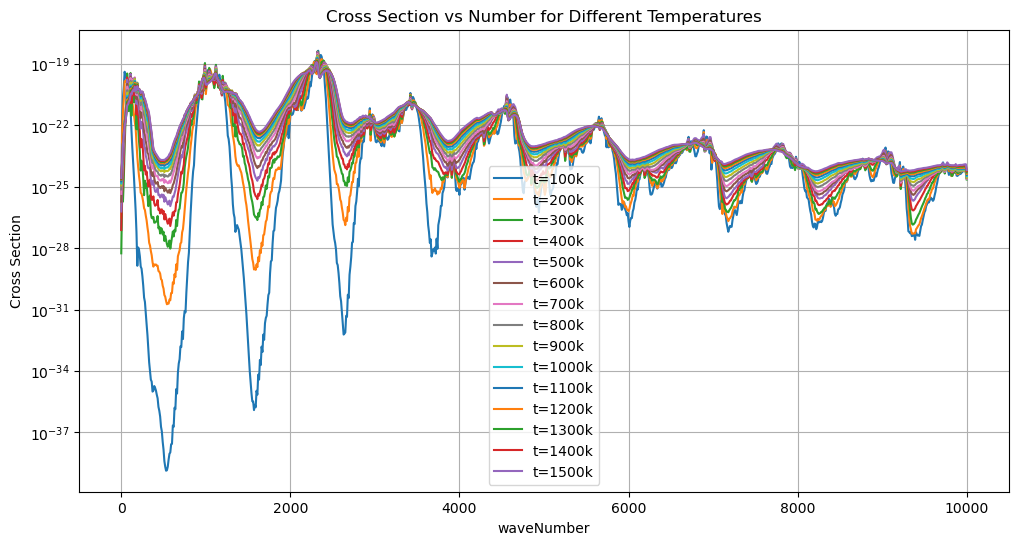

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

for col in df.columns:
    if col != 'wavenumber':
        plt.plot(df['wavenumber'], df[col], label=col)

plt.xlabel('waveNumber')
plt.ylabel('Cross Section')
plt.title('Cross Section vs Number for Different Temperatures')
plt.yscale('log')  # Set the Y-axis to logarithmic coordinates
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import pandas as pd
import numpy as np

# df is your DataFrame with the 'number' column and multiple t=xxxk columns.
columns_to_exclude = ['t=1300k', 't=1400k', 't=1500k']
columns_to_normalize = [col for col in df.columns if col.startswith('t=') and col not in columns_to_exclude]

# Step 1: Extract the parts that need to be standardised
data_to_normalize = df[columns_to_normalize].copy()

# Step 2: Calculate the mean and standard deviation by row
row_means = data_to_normalize.mean(axis=1)
row_stds = data_to_normalize.std(axis=1)

# Step 3:Standardisation by line (broadcast operation)
df_scaled = (data_to_normalize.subtract(row_means, axis=0)).divide(row_stds, axis=0)

# Step 4: Save the mean and standard deviation of each row (optional)
df_stats = pd.DataFrame({
    'wavenumber': df['wavenumber'],
    'row_mean': row_means,
    'row_std': row_stds
})

# Step 5: splice
df_final = pd.concat([df[['wavenumber']], df_scaled, df[columns_to_exclude]], axis=1)

# Optional: sequential listing
final_columns = ['wavenumber'] + columns_to_normalize + columns_to_exclude
df_final = df_final[final_columns]

# Show results
print("Mean and standard deviation for each row：")
print(df_stats.head())

print("\nFirst few rows of standardized data：")
print(df_final.head())

Mean and standard deviation for each row：
   wavenumber      row_mean       row_std
0           0  6.853050e-26  8.051038e-26
1          10  1.951057e-23  5.559874e-23
2          20  2.300602e-22  6.462462e-22
3          30  8.143473e-22  2.241294e-21
4          40  4.759642e-21  1.230314e-20

First few rows of standardized data：
   wavenumber    t=100k    t=200k    t=300k    t=400k    t=500k    t=600k  \
0           0 -0.840898 -0.813346 -0.850501 -0.841598 -0.773793 -0.615356   
1          10  3.123155  0.286892 -0.350435 -0.350014 -0.349077 -0.347830   
2          20  3.112566  0.342681 -0.355965 -0.355705 -0.354184 -0.351413   
3          30  3.089424  0.449896 -0.363237 -0.362624 -0.360322 -0.357431   
4          40  2.995115  0.778080 -0.386060 -0.383833 -0.379422 -0.376804   

     t=700k    t=800k    t=900k   t=1000k   t=1100k   t=1200k       t=1300k  \
0 -0.290703  0.077925  0.599148  0.966081  1.449707  1.933333  2.387418e-25   
1 -0.345105 -0.342004 -0.337346 -0.333938 -0.32

In [5]:
test_df = df[columns_to_exclude].copy()
print(test_df)
test_df = (test_df.subtract(row_means, axis=0)).divide(row_stds, axis=0)
print(test_df)
test_df = pd.concat([df[['wavenumber']], test_df], axis=1)
print(test_df)
train_df = pd.concat([df[['wavenumber']], df_scaled], axis=1)
print(train_df)

           t=1300k       t=1400k       t=1500k
0     2.387418e-25  2.532997e-25  2.711426e-25
1     1.541560e-24  1.635789e-24  1.744601e-24
2     1.274981e-23  1.195877e-23  1.151873e-23
3     3.365570e-23  3.103135e-23  2.965689e-23
4     1.191701e-22  1.035589e-22  9.507743e-23
...            ...           ...           ...
996   9.863146e-25  1.108876e-24  1.226556e-24
997   9.709027e-25  1.091822e-24  1.207888e-24
998   1.000039e-24  1.138582e-24  1.274524e-24
999   9.786080e-25  1.117636e-24  1.254320e-24
1000  5.044506e-25  5.813368e-25  6.585944e-25

[1001 rows x 3 columns]
       t=1300k   t=1400k   t=1500k
0     2.114153  2.294973  2.516595
1    -0.323191 -0.321496 -0.319539
2    -0.336266 -0.337490 -0.338171
3    -0.348322 -0.349493 -0.350106
4    -0.377178 -0.378447 -0.379136
...        ...       ...       ...
996   2.157839  3.192629  4.186210
997   1.610593  2.538518  3.429199
998   1.783132  2.814735  3.826970
999   3.200079  4.479657  5.737661
1000  2.883885  4.030197  

/opt/anaconda3/envs/rdkit_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.028e+03, tolerance: 1.101e+00
  model = cd_fast.enet_coordinate_descent(


Test Mean Squared Error (MSE): 2.3119e+00
Test Root Mean Squared Error (RMSE): 1.5205e+00
Test Mean Absolute Error (MAE): 1.1881e+00
Test R-squared (R2): -0.0369
Test Mean Absolute Percentage Error (MAPE): 307.44%
Test Geometric Mean Error (GME): 7.8642e-01


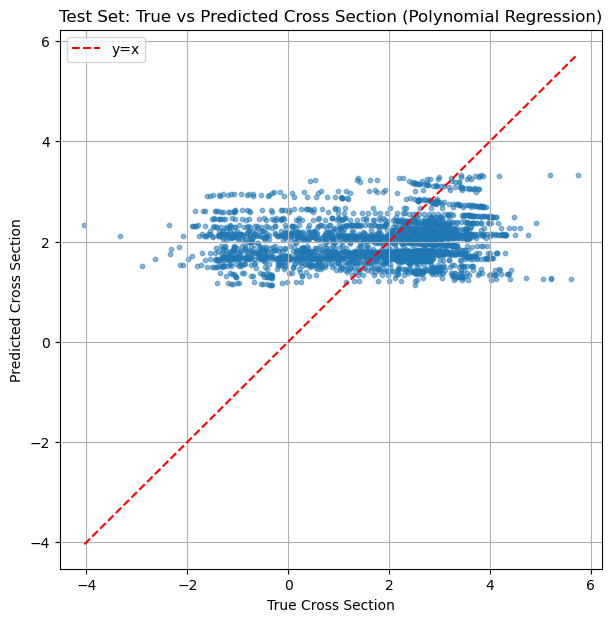

In [6]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Renaming column names
train_df = train_df.rename(columns={'number': 'wavenumber'})

# Convert wide format to long format
long_df = pd.melt(
    train_df,
    id_vars='wavenumber',
    value_vars=[col for col in train_df.columns if col.startswith('t=')],
    var_name='temperature',
    value_name='cross_section'
)

# Clean up the temperature columns and convert to integers
long_df['temperature'] = long_df['temperature'].str.replace('t=', '', regex=False).str.replace('k', '', regex=False).str.replace('K', '', regex=False)
long_df['temperature'] = long_df['temperature'].astype(int)

# Preparing training features and labels
X_train = long_df[['wavenumber', 'temperature']]
y_train = long_df['cross_section']

# Processing test sets
test_df = test_df.rename(columns={'number': 'wavenumber'})

test_long_df = pd.melt(
    test_df,
    id_vars='wavenumber',
    value_vars=['t=1300k', 't=1400k', 't=1500k'],
    var_name='temperature',
    value_name='cross_section'
)

test_long_df['temperature'] = test_long_df['temperature'].str.replace('t=', '', regex=False).str.replace('k', '', regex=False).astype(int)

X_test = test_long_df[['wavenumber', 'temperature']]
y_test = test_long_df['cross_section']


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Lasso
degree = 6  
alpha = 1.0  
model = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    Lasso(alpha=alpha, max_iter=5000)
)

# Training
model.fit(X_train, y_train)

# Predictive Test Set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictive Test Set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import gmean

# Calculate various assessment indicators
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

 # Calculate MAPE, avoid dividing by 0, and add a small constant 1e-8
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100  # In per cent

# Calculate the geometric mean of the prediction error, adding small constants to avoid log(0)
geometric_mean_error = gmean(np.abs(y_test - y_pred) + 1e-8)

# Printing of assessment indicators
print(f"Test Mean Squared Error (MSE): {mse:.4e}")
print(f"Test Root Mean Squared Error (RMSE): {rmse:.4e}")
print(f"Test Mean Absolute Error (MAE): {mae:.4e}")
print(f"Test R-squared (R2): {r2:.4f}")
print(f"Test Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Test Geometric Mean Error (GME): {geometric_mean_error:.4e}")


# Scatterplotting of prediction results
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='y=x')
plt.xlabel('True Cross Section')
plt.ylabel('Predicted Cross Section')
plt.title('Test Set: True vs Predicted Cross Section (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()


      wavenumber  temperature  cross_section  predicted
0              0         1300       2.114153   1.276765
1             10         1300      -0.323191   1.279393
2             20         1300      -0.336266   1.282014
3             30         1300      -0.348322   1.284629
4             40         1300      -0.377178   1.287238
...          ...          ...            ...        ...
2998        9960         1500       4.186210   3.315644
2999        9970         1500       3.429199   3.320653
3000        9980         1500       3.826970   3.325681
3001        9990         1500       5.737661   3.330727
3002       10000         1500       5.182047   3.335793

[3003 rows x 4 columns]


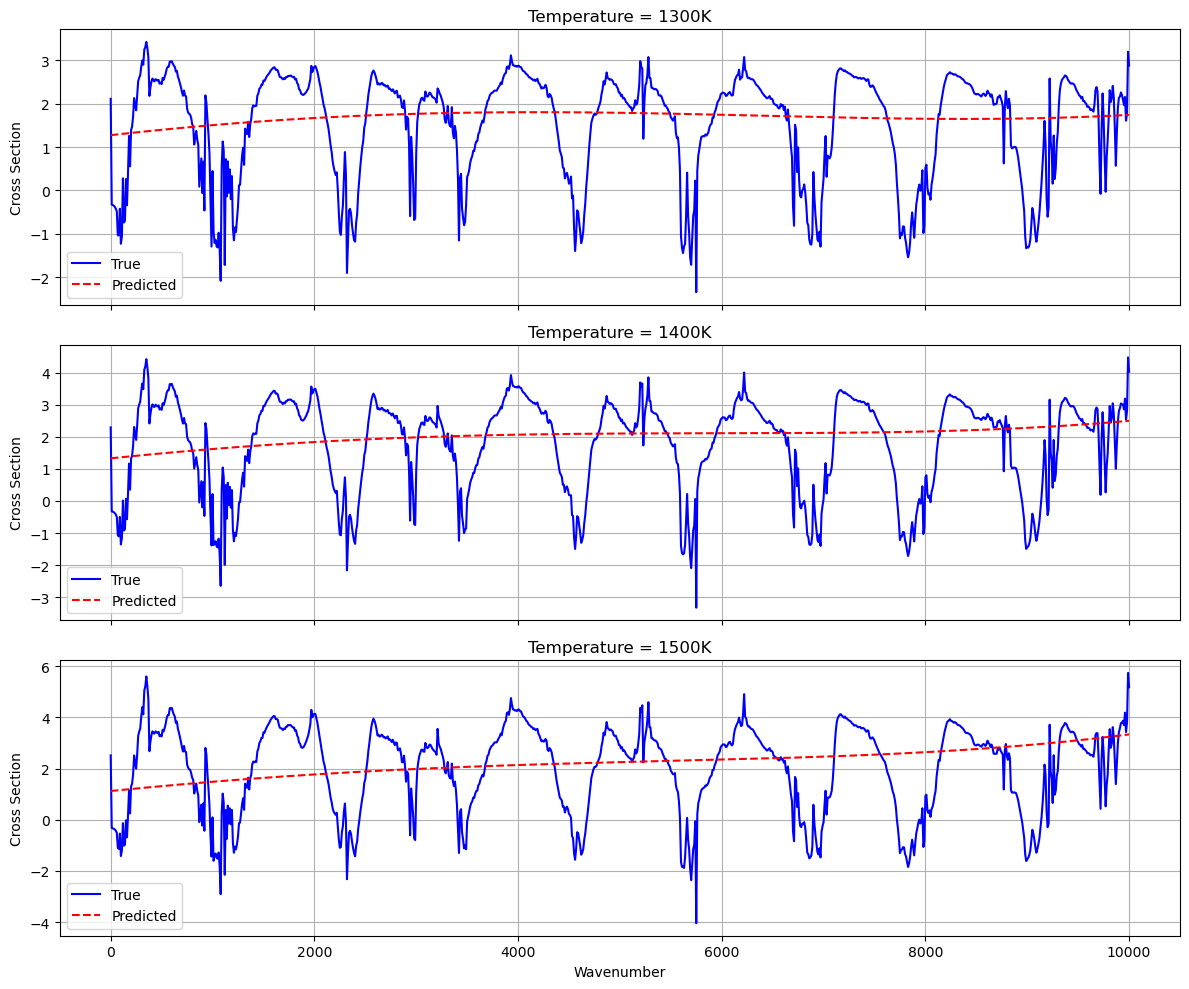

In [7]:
test_long_df['predicted'] = y_pred
print(test_long_df)
temperatures = [1300, 1400, 1500]

fig, axs = plt.subplots(len(temperatures), 1, figsize=(12, 10), sharex=True)

for i, temp in enumerate(temperatures):
    subset = test_long_df[test_long_df['temperature'] == temp]
    axs[i].plot(subset['wavenumber'], subset['cross_section'], label='True', color='blue')
    axs[i].plot(subset['wavenumber'], subset['predicted'], label='Predicted', color='red', linestyle='--')
    axs[i].set_title(f'Temperature = {temp}K')
    axs[i].set_ylabel('Cross Section')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Wavenumber')
plt.tight_layout()
plt.show()
# Prepare an empty list to hold the restored values
cross_section_restored = []
predicted_restored = []

#Index df_stats for easier searching
df_stats_indexed = df_stats.set_index('wavenumber')

for idx, row in test_long_df.iterrows():
    wnum = row['wavenumber']
    
      # Find the corresponding mean and standard deviation
    mean = df_stats_indexed.loc[wnum, 'row_mean']
    std = df_stats_indexed.loc[wnum, 'row_std']
    
    # inverse normalised = normalised value * std + mean
    cs_restored = row['cross_section'] * std + mean
    pred_restored = row['predicted'] * std + mean
    
    cross_section_restored.append(cs_restored)
    predicted_restored.append(pred_restored)

# Assigns the restored value back to the DataFrame.
test_long_df['cross_section_restored'] = cross_section_restored
test_long_df['predicted_restored'] = predicted_restored

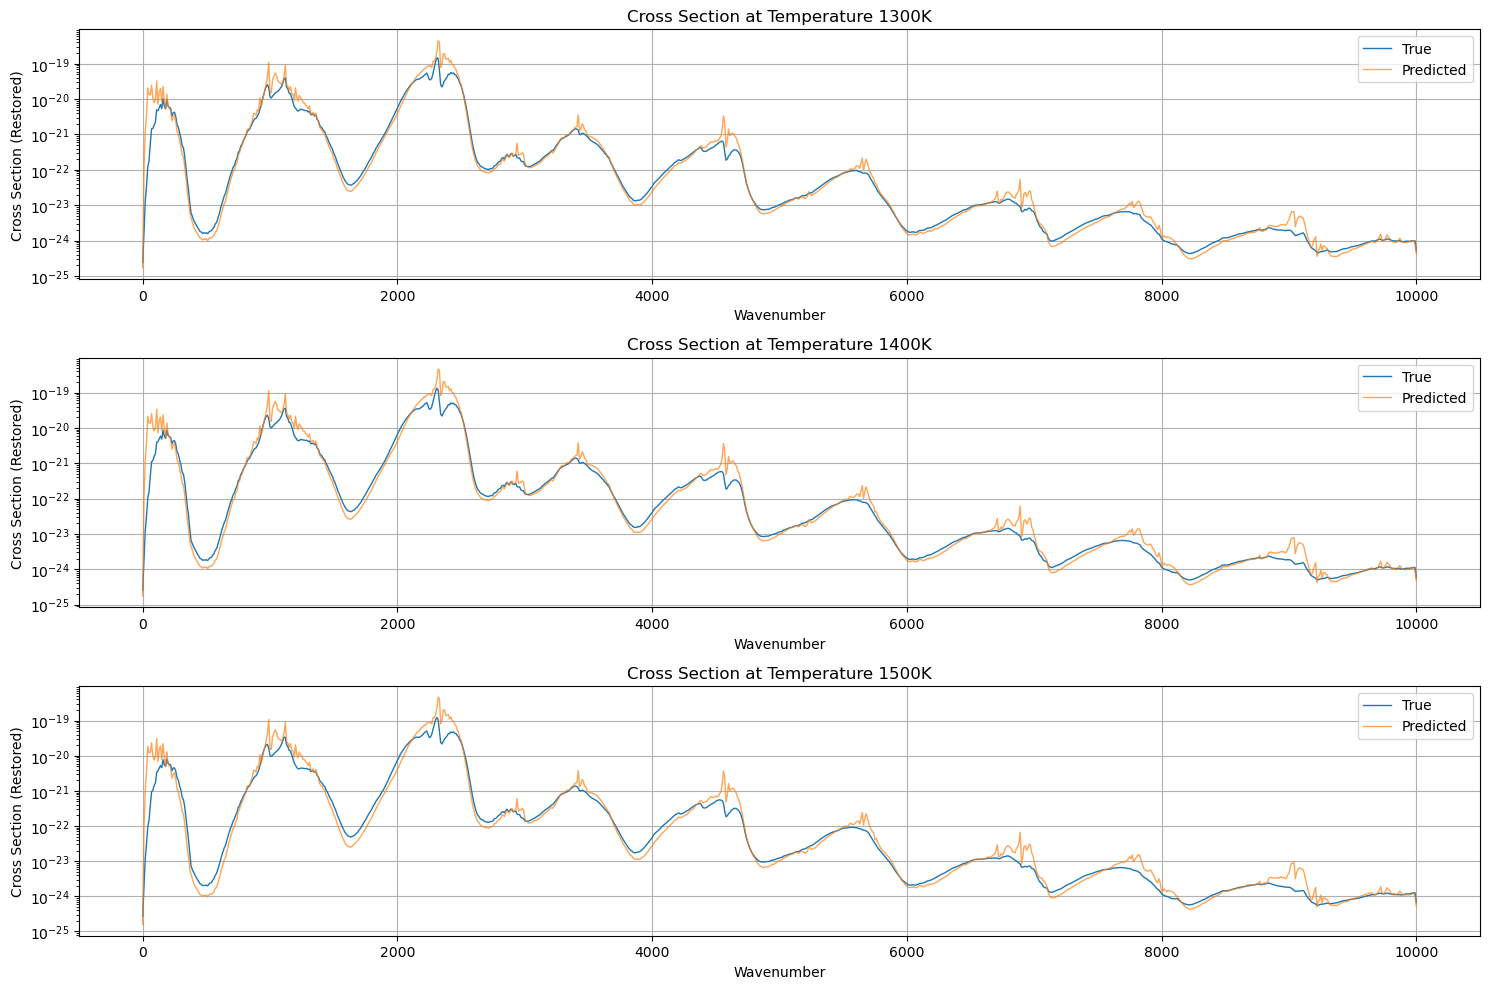

In [8]:
import matplotlib.pyplot as plt

temps = [1300, 1400, 1500]
plt.figure(figsize=(15, 10))

for i, temp in enumerate(temps, 1):
    plt.subplot(3, 1, i)
    subset = test_long_df[test_long_df['temperature'] == temp]
    plt.plot(subset['wavenumber'], subset['cross_section_restored'], label='True', linewidth=1)
    plt.plot(subset['wavenumber'], subset['predicted_restored'], label='Predicted', linewidth=1, alpha=0.7)
    plt.title(f'Cross Section at Temperature {temp}K')
    plt.xlabel('Wavenumber')
    plt.ylabel('Cross Section (Restored)')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')

plt.tight_layout()
plt.show()

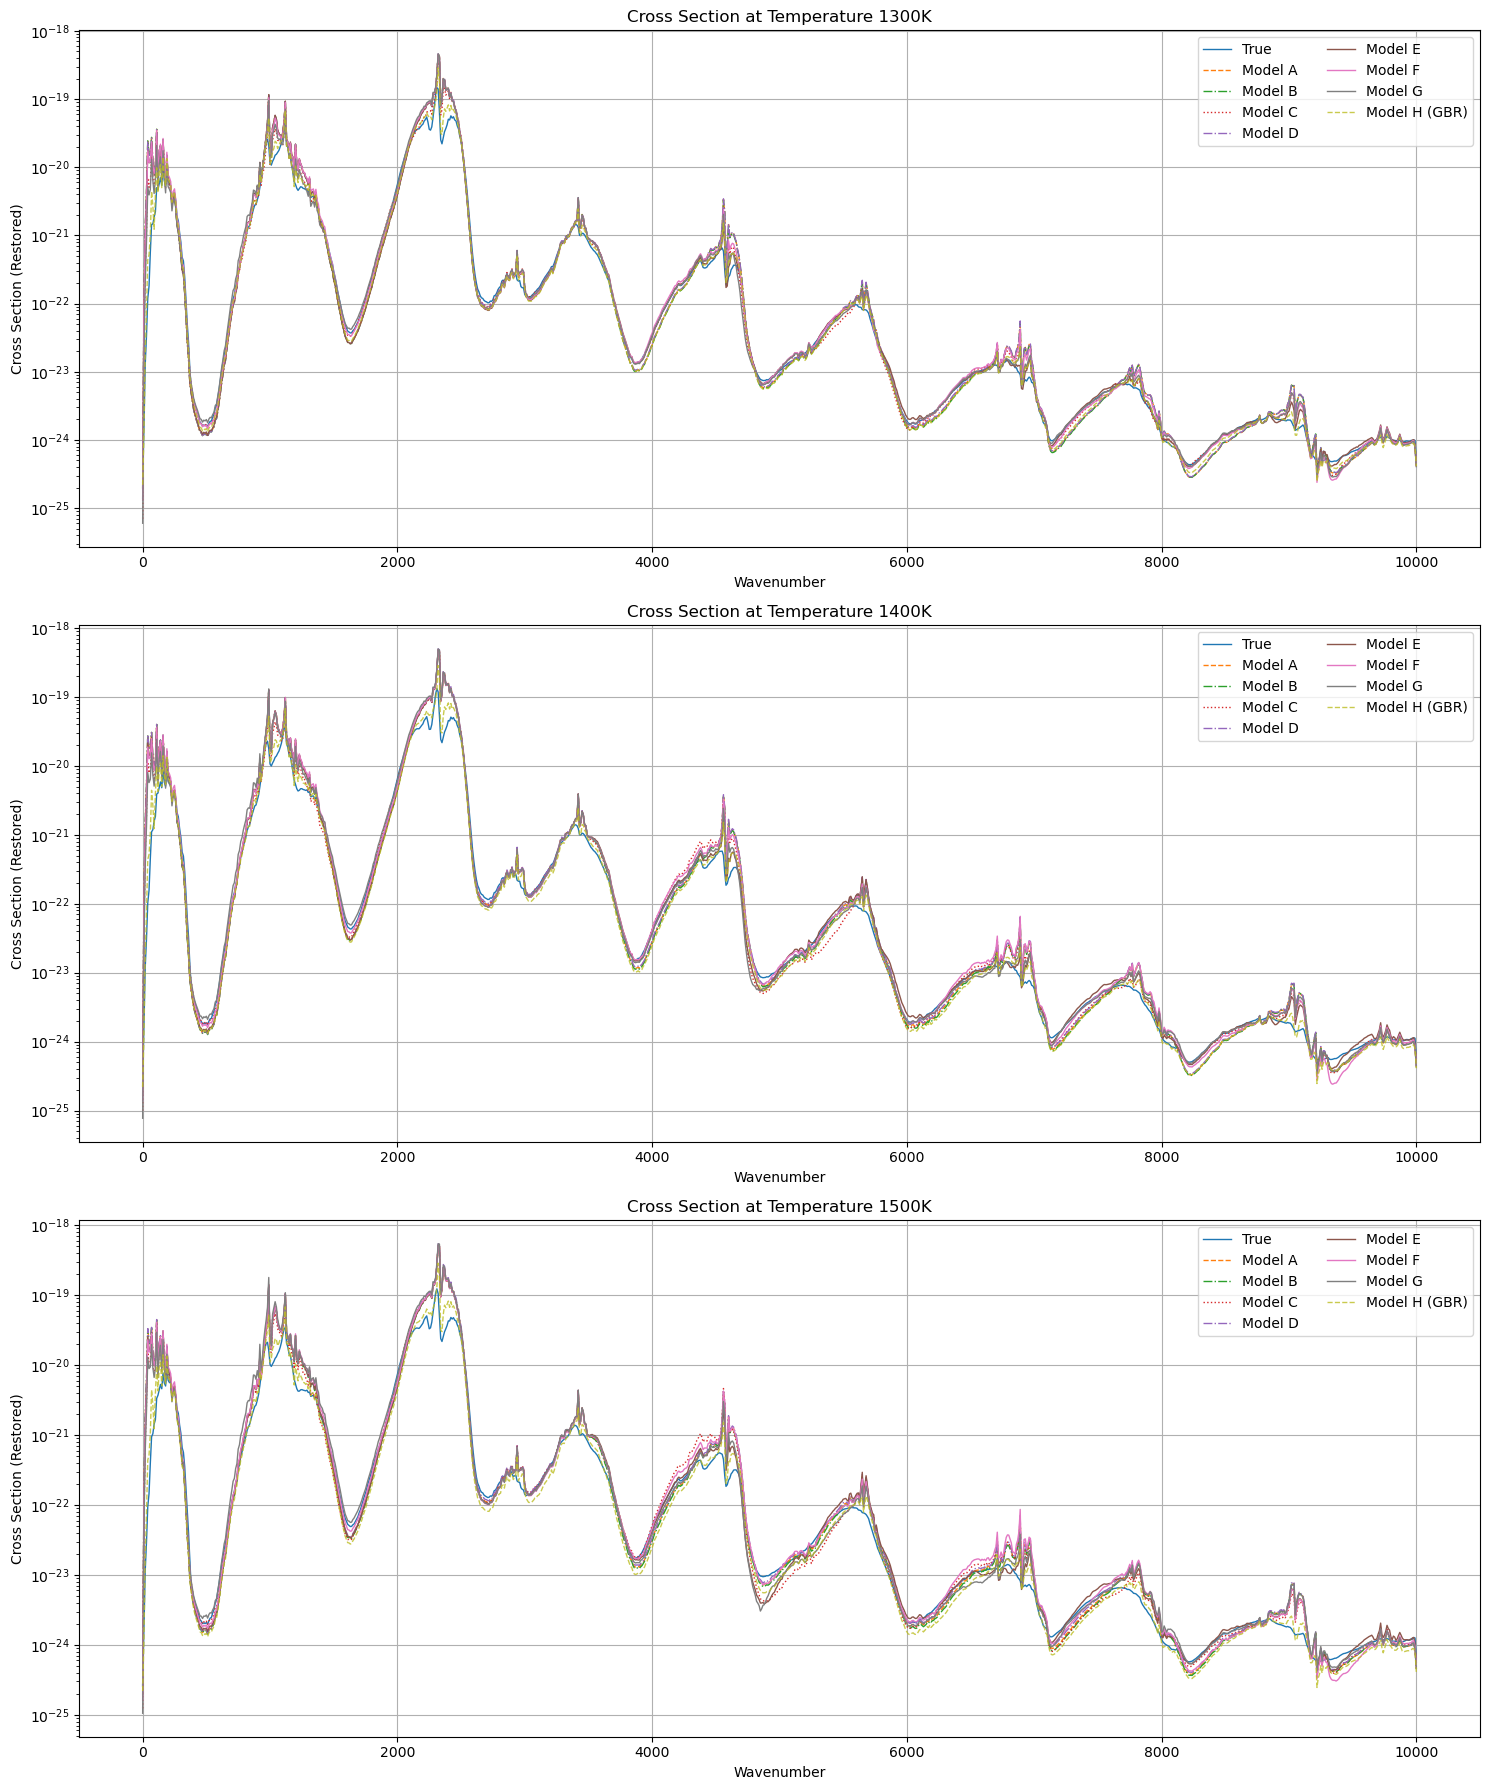

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

#Unified preprocessing pipeline functions
def make_poly_mlp(model, degree=2):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        model
    )

# Original model (neural network)
model_a = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 64, 32), max_iter=500, random_state=0))
model_b = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 64, 32), activation='relu', max_iter=5000, random_state=42))

# New neural network models added
model_c = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=500, random_state=1))
model_d = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=2))
model_e = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32, 16), max_iter=1000, random_state=3))
model_f = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(512, 256), max_iter=1000, random_state=4))
model_g = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 128), max_iter=1000, random_state=5))

# Non-neural network models remain unchanged
model_h = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=6)

# Fitting the individual models
model_a.fit(X_train, y_train)
model_b.fit(X_train, y_train)
model_c.fit(X_train, y_train)
model_d.fit(X_train, y_train)
model_e.fit(X_train, y_train)
model_f.fit(X_train, y_train)
model_g.fit(X_train, y_train)
model_h.fit(X_train, y_train)

# Predicting on the test set
test_long_df['pred_a'] = model_a.predict(X_test)
test_long_df['pred_b'] = model_b.predict(X_test)
test_long_df['pred_c'] = model_c.predict(X_test)
test_long_df['pred_d'] = model_d.predict(X_test)
test_long_df['pred_e'] = model_e.predict(X_test)
test_long_df['pred_f'] = model_f.predict(X_test)
test_long_df['pred_g'] = model_g.predict(X_test)
test_long_df['pred_h'] = model_h.predict(X_test)

#Reducing the results before standardisation
cross_section_restored = []
pred_a_restored = []
pred_b_restored = []
pred_c_restored = []
pred_d_restored = []
pred_e_restored = []
pred_f_restored = []
pred_g_restored = []
pred_h_restored = []
df_stats_indexed = df_stats.set_index('wavenumber')

for idx, row in test_long_df.iterrows():
    wnum = row['wavenumber']
    mean = df_stats_indexed.loc[wnum, 'row_mean']
    std = df_stats_indexed.loc[wnum, 'row_std']
    
    cross_section_restored.append(row['cross_section'] * std + mean)
    pred_a_restored.append(row['pred_a'] * std + mean)
    pred_b_restored.append(row['pred_b'] * std + mean)
    pred_c_restored.append(row['pred_c'] * std + mean)
    pred_d_restored.append(row['pred_d'] * std + mean)
    pred_e_restored.append(row['pred_e'] * std + mean)
    pred_f_restored.append(row['pred_f'] * std + mean)
    pred_g_restored.append(row['pred_g'] * std + mean)
    pred_h_restored.append(row['pred_h'] * std + mean)    
    
test_long_df['cross_section_restored'] = cross_section_restored
test_long_df['pred_a_restored'] = pred_a_restored
test_long_df['pred_b_restored'] = pred_b_restored
test_long_df['pred_c_restored'] = pred_c_restored
test_long_df['pred_d_restored'] = pred_d_restored
test_long_df['pred_e_restored'] = pred_e_restored
test_long_df['pred_f_restored'] = pred_f_restored
test_long_df['pred_g_restored'] = pred_g_restored
test_long_df['pred_h_restored'] = pred_h_restored

# Plotting the predictions of different models against the true values
temps = [1300, 1400, 1500]
plt.figure(figsize=(15, 18))
for i, temp in enumerate(temps, 1):
    subset = test_long_df[test_long_df['temperature'] == temp]
    plt.subplot(3, 1, i)
    plt.plot(subset['wavenumber'], subset['cross_section_restored'], label='True', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_a_restored'], label='Model A', linestyle='--', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_b_restored'], label='Model B', linestyle='-.', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_c_restored'], label='Model C', linestyle=':', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_d_restored'], label='Model D', linestyle='dashdot', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_e_restored'], label='Model E', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_f_restored'], label='Model F', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_g_restored'], label='Model G', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_h_restored'], label='Model H (GBR)', linestyle='--', linewidth=1, alpha=0.8)
    
    plt.title(f'Cross Section at Temperature {temp}K')
    plt.xlabel('Wavenumber')
    plt.ylabel('Cross Section (Restored)')
    plt.yscale('log')
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)

plt.tight_layout()
plt.show()


每行的均值和标准差：
   wavenumber      row_mean       row_std
0           0  1.124043e-25  1.165611e-25
1          10  1.978963e-23  5.549692e-23
2          20  2.309703e-22  6.459069e-22
3          30  8.152372e-22  2.240953e-21
4          40  4.745648e-21  1.230887e-20

标准化后的数据前几行：
   wavenumber    t=100k    t=200k    t=300k    t=400k    t=500k    t=600k  \
0           0 -0.957222 -0.938191 -0.963855 -0.957705 -0.910872 -0.801437   
1          10  3.123856  0.282390 -0.356107 -0.355684 -0.354746 -0.353496   
2          20  3.112792  0.341452 -0.357561 -0.357301 -0.355779 -0.353006   
3          30  3.089497  0.449567 -0.363689 -0.363076 -0.360774 -0.357883   
4          40  2.994858  0.778855 -0.384743 -0.382518 -0.378109 -0.375492   

    t=1000k   t=1100k   t=1200k   t=1300k   t=1400k   t=1500k        t=700k  \
0  0.290884  0.624931  0.958979  1.083874  1.208768  1.361846  4.512590e-26   
1 -0.339579 -0.335044 -0.330510 -0.328812 -0.327114 -0.325154  3.231505e-25   
2 -0.339315 -0.337971 -0

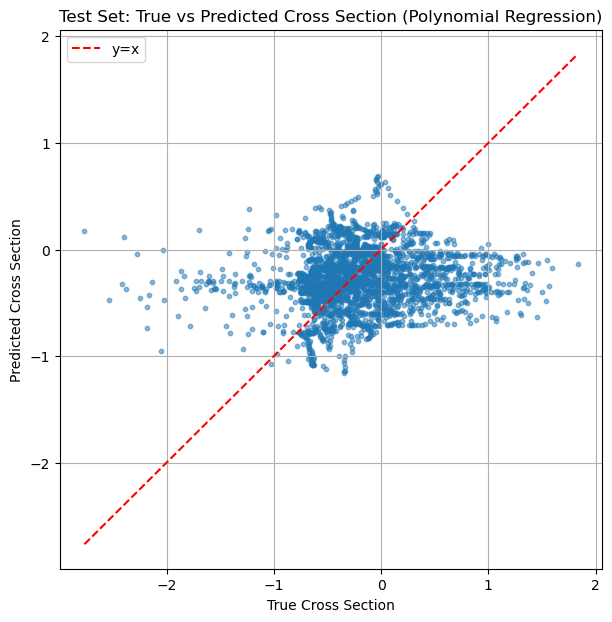

In [10]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with 'number' columns and multiple t=xxxk columns
columns_to_exclude = ['t=700k', 't=800k', 't=900k']
columns_to_normalize = [col for col in df.columns if col.startswith('t=') and col not in columns_to_exclude]

# Step 1: Extract the parts to be standardised
data_to_normalize = df[columns_to_normalize].copy()

# Step 2: Calculate mean and standard deviation by rows
row_means = data_to_normalize.mean(axis=1)
row_stds = data_to_normalize.std(axis=1)

# Step 3: Standardisation by row (broadcast operation)
df_scaled = (data_to_normalize.subtract(row_means, axis=0)).divide(row_stds, axis=0)

# Step 4: Save each row mean and standard deviation (optional)
df_stats = pd.DataFrame({
    'wavenumber': df['wavenumber'],
    'row_mean': row_means,
    'row_std': row_stds
})

# Step 5: Re-splicing
df_final = pd.concat([df[['wavenumber']], df_scaled, df[columns_to_exclude]], axis=1)

# Optional: list listings in order
final_columns = ['wavenumber'] + columns_to_normalize + columns_to_exclude
df_final = df_final[final_columns]

# Show results
print("Mean and standard deviation for each row：")
print(df_stats.head())

print("\nFirst few rows of standardised data：")
print(df_final.head())
test_df = df[columns_to_exclude].copy()
test_df = (test_df.subtract(row_means, axis=0)).divide(row_stds, axis=0)
test_df = pd.concat([df[['wavenumber']], test_df], axis=1)
train_df = pd.concat([df[['wavenumber']], df_scaled], axis=1)
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Rename columns
train_df = train_df.rename(columns={'number': 'wavenumber'})

# Clean up the temperature columns, convert to integers
long_df = pd.melt(
    train_df,
    id_vars='wavenumber',
    value_vars=[col for col in train_df.columns if col.startswith('t=')],
    var_name='temperature',
    value_name='cross_section'
)

# Clean up the temperature columns, convert to integers
long_df['temperature'] = long_df['temperature'].str.replace('t=', '', regex=False).str.replace('k', '', regex=False).str.replace('K', '', regex=False)
long_df['temperature'] = long_df['temperature'].astype(int)

# Prepare training features and labels
X_train = long_df[['wavenumber', 'temperature']]
y_train = long_df['cross_section']
print(long_df)
# Processing test sets
test_df = test_df.rename(columns={'number': 'wavenumber'})

test_long_df = pd.melt(
    test_df,
    id_vars='wavenumber',
    value_vars=['t=700k', 't=800k', 't=900k'],
    var_name='temperature',
    value_name='cross_section'
)

test_long_df['temperature'] = test_long_df['temperature'].str.replace('t=', '', regex=False).str.replace('k', '', regex=False).astype(int)
print(test_long_df)
X_test = test_long_df[['wavenumber', 'temperature']]
y_test = test_long_df['cross_section']
print(X_test)
print(y_test)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPRegressor

model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),  # 多项式特征
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(128, 64, 64, 32), activation='relu', max_iter=5000, random_state=42)
)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import gmean

# Calculate various assessment indicators
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE, avoid division by 0, add a small constant 1e-8
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100  # 百分比形式

# Calculate the geometric mean of the prediction error, adding small constants to avoid log(0)
geometric_mean_error = gmean(np.abs(y_test - y_pred) + 1e-8)

# Print assessment indicators
print(f"Test Mean Squared Error (MSE): {mse:.4e}")
print(f"Test Root Mean Squared Error (RMSE): {rmse:.4e}")
print(f"Test Mean Absolute Error (MAE): {mae:.4e}")
print(f"Test R-squared (R2): {r2:.4f}")
print(f"Test Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Test Geometric Mean Error (GME): {geometric_mean_error:.4e}")



# Scatter plots of forecast results
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='y=x')
plt.xlabel('True Cross Section')
plt.ylabel('Predicted Cross Section')
plt.title('Test Set: True vs Predicted Cross Section (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

      wavenumber  temperature  cross_section  predicted
0              0          700      -0.577194  -0.061913
1             10          700      -0.350767  -0.062569
2             20          700      -0.348402  -0.064326
3             30          700      -0.353849  -0.066588
4             40          700      -0.372682  -0.068845
...          ...          ...            ...        ...
2998        9960          900      -1.138957  -0.313460
2999        9970          900      -1.362587  -0.315008
3000        9980          900      -1.564920  -0.315665
3001        9990          900      -0.866532  -0.316324
3002       10000          900      -0.841472  -0.316119

[3003 rows x 4 columns]


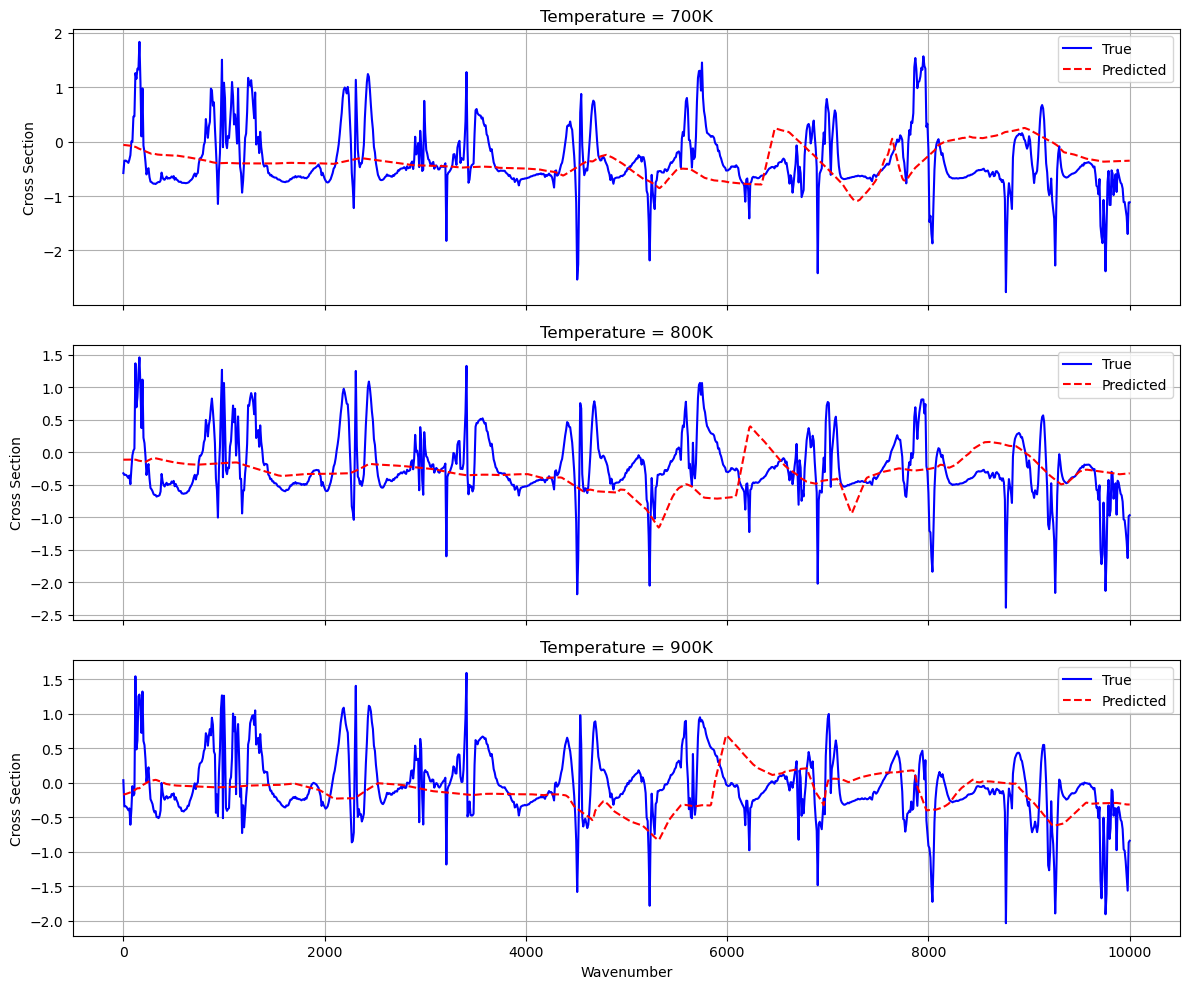

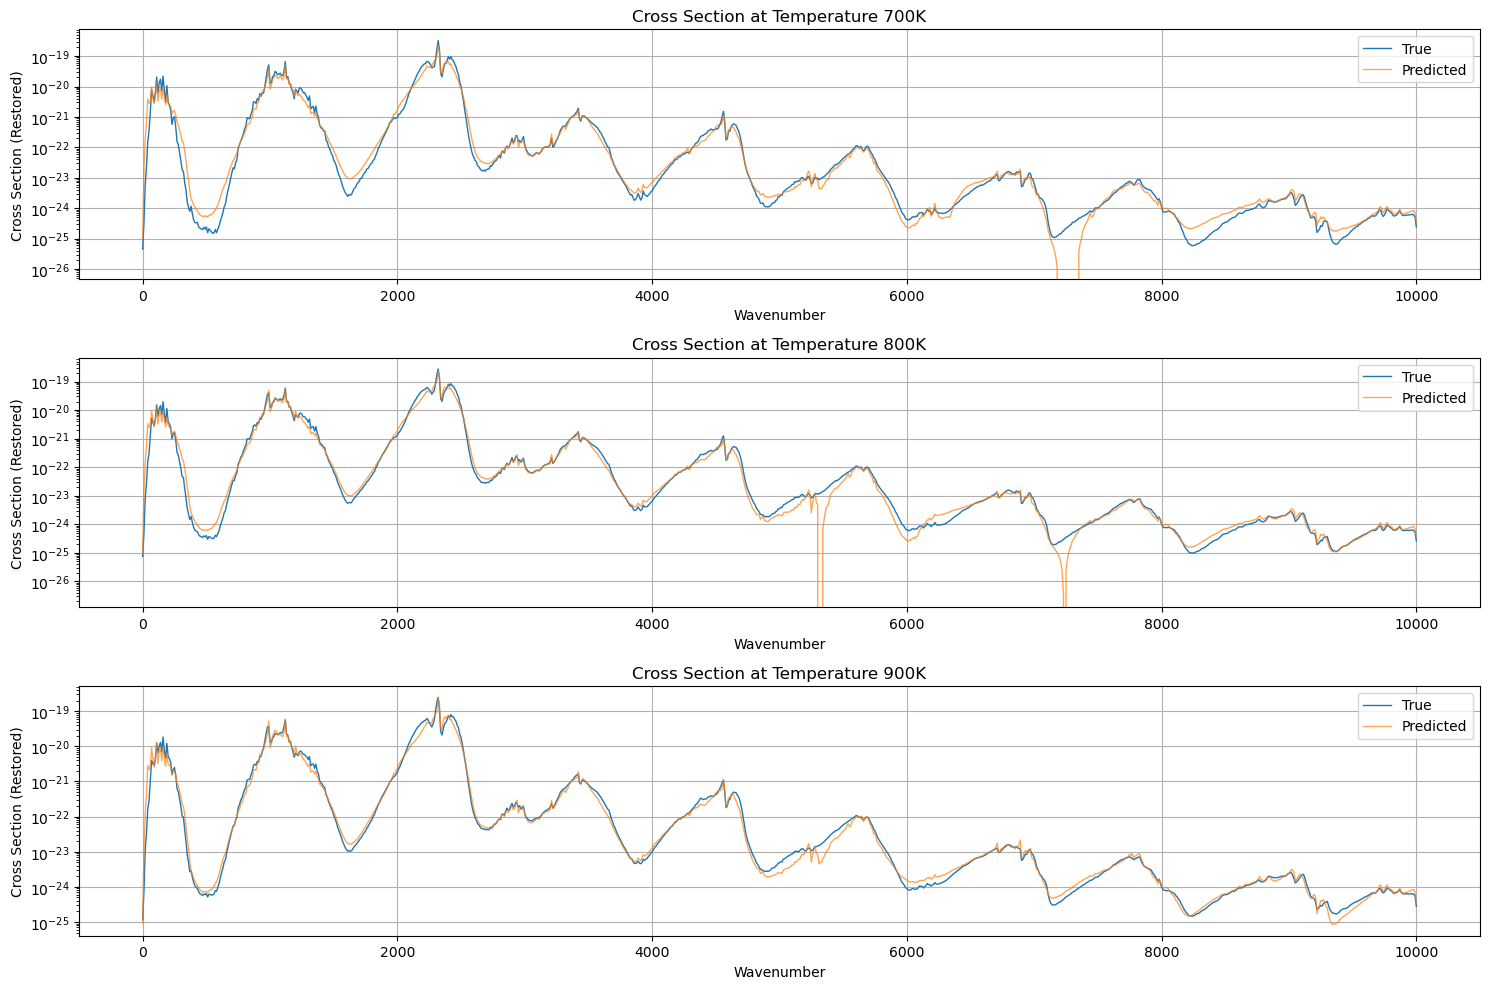

In [11]:
test_long_df['predicted'] = y_pred
print(test_long_df)
temperatures = [700, 800, 900]

fig, axs = plt.subplots(len(temperatures), 1, figsize=(12, 10), sharex=True)

for i, temp in enumerate(temperatures):
    subset = test_long_df[test_long_df['temperature'] == temp]
    axs[i].plot(subset['wavenumber'], subset['cross_section'], label='True', color='blue')
    axs[i].plot(subset['wavenumber'], subset['predicted'], label='Predicted', color='red', linestyle='--')
    axs[i].set_title(f'Temperature = {temp}K')
    axs[i].set_ylabel('Cross Section')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Wavenumber')
plt.tight_layout()
plt.show()

cross_section_restored = []
predicted_restored = []

# Index df_stats for easy searching
df_stats_indexed = df_stats.set_index('wavenumber')

for idx, row in test_long_df.iterrows():
    wnum = row['wavenumber']
    
    # Find the corresponding mean and standard deviation
    mean = df_stats_indexed.loc[wnum, 'row_mean']
    std = df_stats_indexed.loc[wnum, 'row_std']
    
    # inverse normalised = normalised value * std + mean
    cs_restored = row['cross_section'] * std + mean
    pred_restored = row['predicted'] * std + mean
    
    cross_section_restored.append(cs_restored)
    predicted_restored.append(pred_restored)

# Assigns the restored value back to the DataFrame.
test_long_df['cross_section_restored'] = cross_section_restored
test_long_df['predicted_restored'] = predicted_restored
import matplotlib.pyplot as plt

temps = [700, 800, 900]
plt.figure(figsize=(15, 10))

for i, temp in enumerate(temps, 1):
    plt.subplot(3, 1, i)
    subset = test_long_df[test_long_df['temperature'] == temp]
    plt.plot(subset['wavenumber'], subset['cross_section_restored'], label='True', linewidth=1)
    plt.plot(subset['wavenumber'], subset['predicted_restored'], label='Predicted', linewidth=1, alpha=0.7)
    plt.title(f'Cross Section at Temperature {temp}K')
    plt.xlabel('Wavenumber')
    plt.ylabel('Cross Section (Restored)')
    plt.legend()
    plt.yscale('log')
    plt.grid(True)

plt.tight_layout()
plt.show()

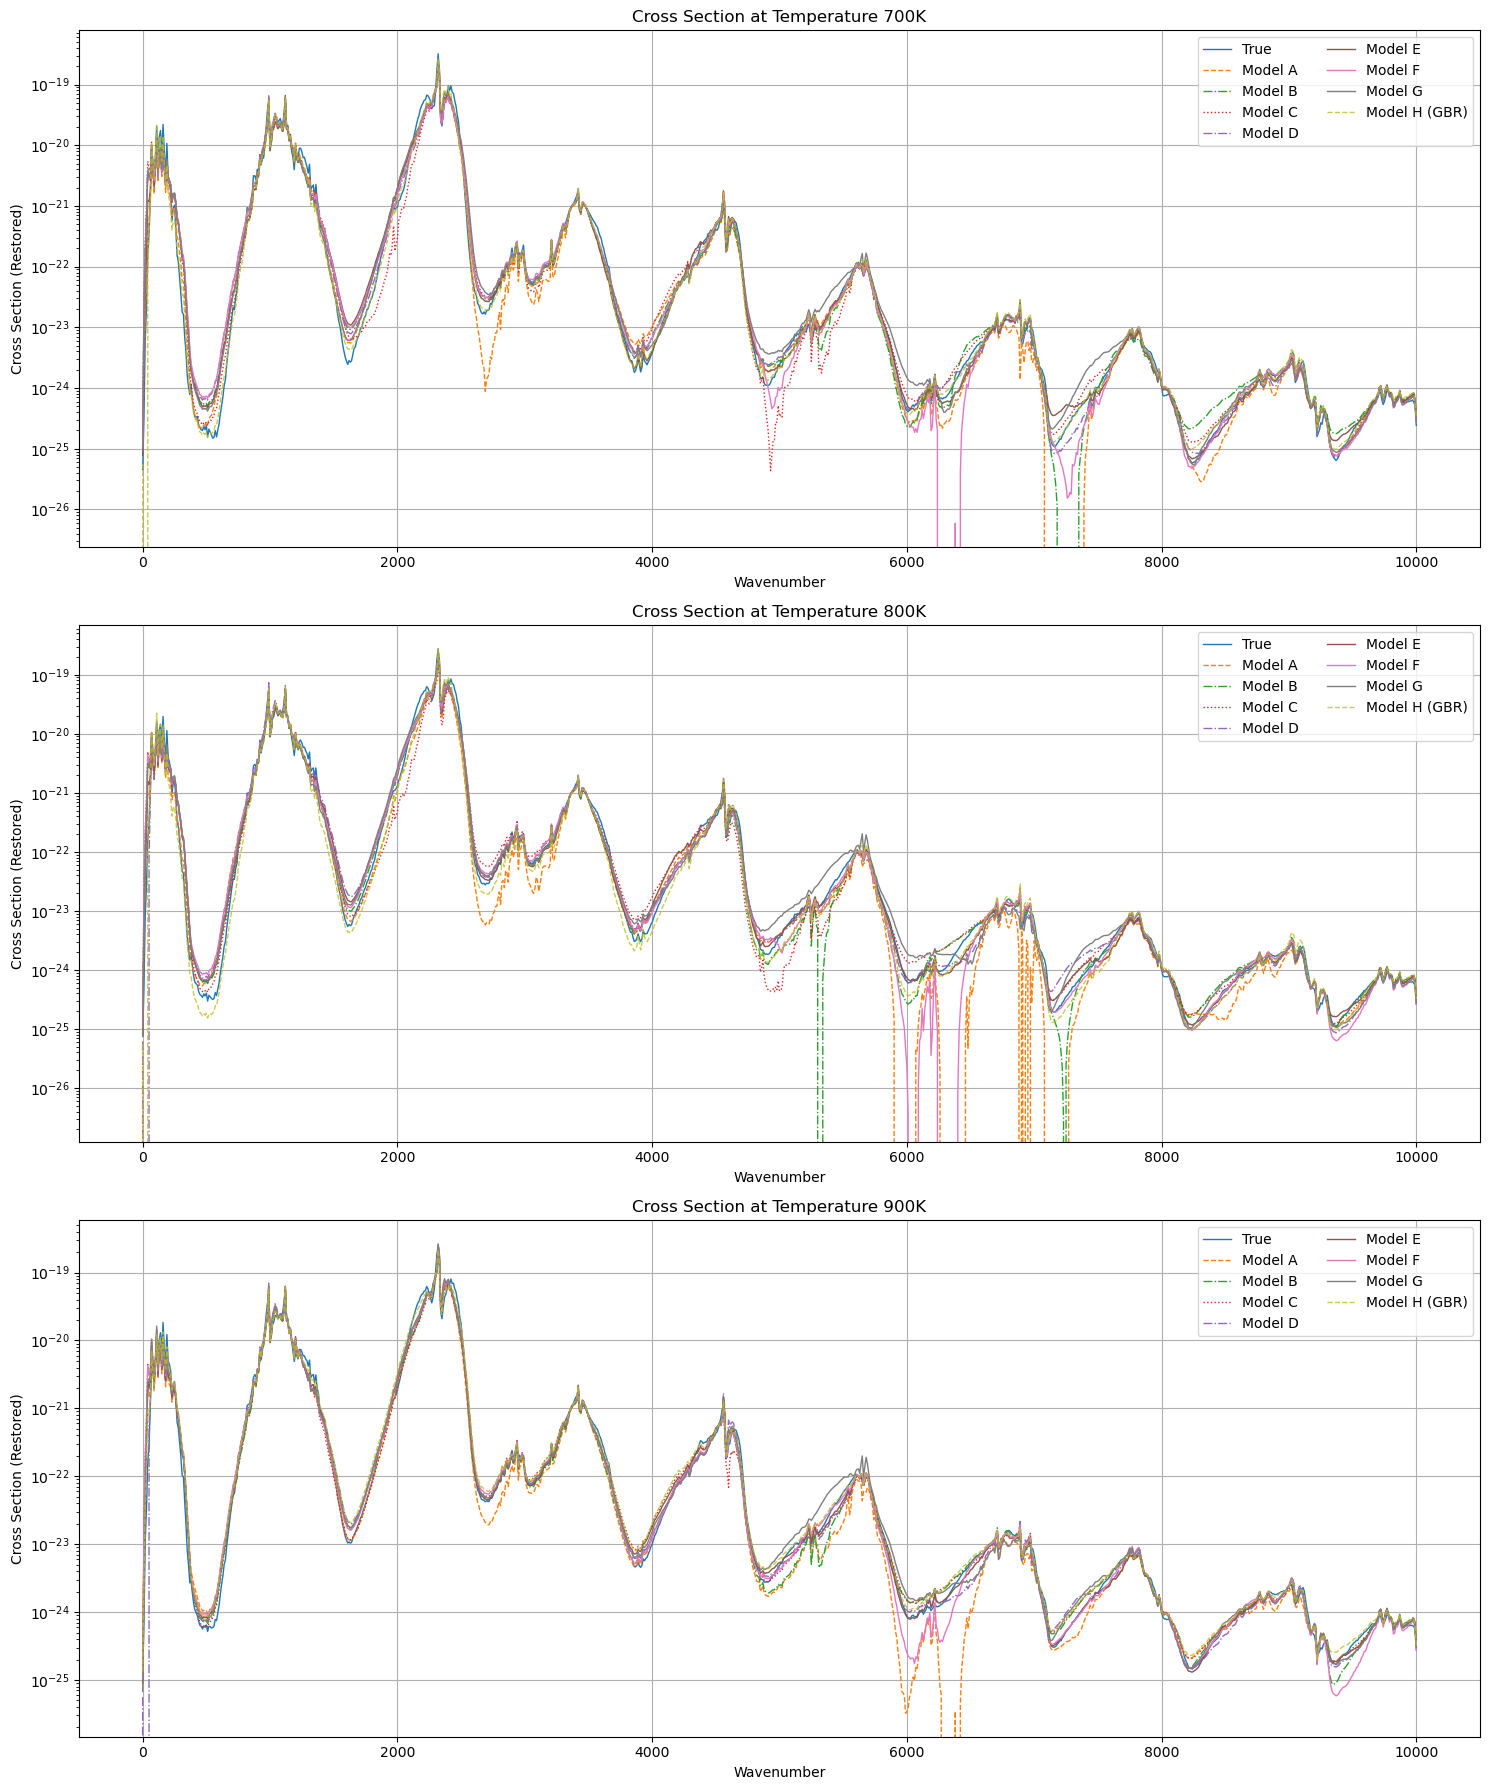

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Unified pre-processing pipeline functions
def make_poly_mlp(model, degree=2):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        model
    )

# Original model (neural network)
model_a = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 64, 32), max_iter=500, random_state=0))
model_b = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 64, 32), activation='relu', max_iter=5000, random_state=42))

# New neural network models added
model_c = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=500, random_state=1))
model_d = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=2))
model_e = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32, 16), max_iter=1000, random_state=3))
model_f = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(512, 256), max_iter=1000, random_state=4))
model_g = make_poly_mlp(MLPRegressor(hidden_layer_sizes=(128, 64, 128), max_iter=1000, random_state=5))

# Non-neural network models remain unchanged
model_h = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=6)

# Fitting individual models
model_a.fit(X_train, y_train)
model_b.fit(X_train, y_train)
model_c.fit(X_train, y_train)
model_d.fit(X_train, y_train)
model_e.fit(X_train, y_train)
model_f.fit(X_train, y_train)
model_g.fit(X_train, y_train)
model_h.fit(X_train, y_train)

# Predictions on the test set
test_long_df['pred_a'] = model_a.predict(X_test)
test_long_df['pred_b'] = model_b.predict(X_test)
test_long_df['pred_c'] = model_c.predict(X_test)
test_long_df['pred_d'] = model_d.predict(X_test)
test_long_df['pred_e'] = model_e.predict(X_test)
test_long_df['pred_f'] = model_f.predict(X_test)
test_long_df['pred_g'] = model_g.predict(X_test)
test_long_df['pred_h'] = model_h.predict(X_test)

# Restore pre-standardisation results
cross_section_restored = []
pred_a_restored = []
pred_b_restored = []
pred_c_restored = []
pred_d_restored = []
pred_e_restored = []
pred_f_restored = []
pred_g_restored = []
pred_h_restored = []
df_stats_indexed = df_stats.set_index('wavenumber')

for idx, row in test_long_df.iterrows():
    wnum = row['wavenumber']
    mean = df_stats_indexed.loc[wnum, 'row_mean']
    std = df_stats_indexed.loc[wnum, 'row_std']
    
    cross_section_restored.append(row['cross_section'] * std + mean)
    pred_a_restored.append(row['pred_a'] * std + mean)
    pred_b_restored.append(row['pred_b'] * std + mean)
    pred_c_restored.append(row['pred_c'] * std + mean)
    pred_d_restored.append(row['pred_d'] * std + mean)
    pred_e_restored.append(row['pred_e'] * std + mean)
    pred_f_restored.append(row['pred_f'] * std + mean)
    pred_g_restored.append(row['pred_g'] * std + mean)
    pred_h_restored.append(row['pred_h'] * std + mean)    
    
test_long_df['cross_section_restored'] = cross_section_restored
test_long_df['pred_a_restored'] = pred_a_restored
test_long_df['pred_b_restored'] = pred_b_restored
test_long_df['pred_c_restored'] = pred_c_restored
test_long_df['pred_d_restored'] = pred_d_restored
test_long_df['pred_e_restored'] = pred_e_restored
test_long_df['pred_f_restored'] = pred_f_restored
test_long_df['pred_g_restored'] = pred_g_restored
test_long_df['pred_h_restored'] = pred_h_restored

# Plotting the predictions of different models against the true values
temps = [700, 800, 900]
plt.figure(figsize=(15, 18))
for i, temp in enumerate(temps, 1):
    subset = test_long_df[test_long_df['temperature'] == temp]
    plt.subplot(3, 1, i)
    plt.plot(subset['wavenumber'], subset['cross_section_restored'], label='True', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_a_restored'], label='Model A', linestyle='--', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_b_restored'], label='Model B', linestyle='-.', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_c_restored'], label='Model C', linestyle=':', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_d_restored'], label='Model D', linestyle='dashdot', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_e_restored'], label='Model E', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_f_restored'], label='Model F', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_g_restored'], label='Model G', linestyle='-', linewidth=1)
    plt.plot(subset['wavenumber'], subset['pred_h_restored'], label='Model H (GBR)', linestyle='--', linewidth=1, alpha=0.8)
    
    plt.title(f'Cross Section at Temperature {temp}K')
    plt.xlabel('Wavenumber')
    plt.ylabel('Cross Section (Restored)')
    plt.yscale('log')
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)

plt.tight_layout()
plt.show()
